In [3]:
#importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [6]:
#loading data
data = pd.read_excel('covid_data.xlsx')
data.head()

,Fever,BodyPain,Age,Runnynose,BreathingProblem,Infected
0,99.329862,0,26,1,-1,0
1,98.115263,1,61,1,0,1
2,99.918088,1,13,0,-1,0
3,101.344456,1,55,1,0,1
4,100.056678,1,37,0,1,0


In [15]:
#shape of the data
print(data.shape)

(1999, 6)


In [8]:
#rounding off the  fever to 3 decimal place
data['Fever'] = data['Fever'].round(2)
data.head()

,Fever,BodyPain,Age,Runnynose,BreathingProblem,Infected
0,99.33,0,26,1,-1,0
1,98.12,1,61,1,0,1
2,99.92,1,13,0,-1,0
3,101.34,1,55,1,0,1
4,100.06,1,37,0,1,0


In [9]:
#columns
column_list=list(data.columns)
print(column_list)

['Fever', 'BodyPain', 'Age', 'Runnynose', 'BreathingProblem', 'Infected']


In [10]:
#checking missing values
print(data.isna().sum())

Fever               0
BodyPain            0
Age                 0
Runnynose           0
BreathingProblem    0
Infected            0
dtype: int64


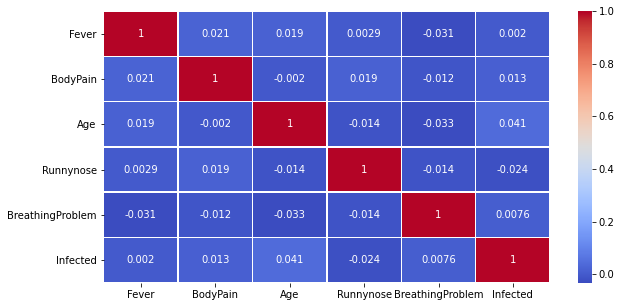

In [11]:
#data correlation heatmap-visualization
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True, linewidth = 0.5)

In [12]:
#features of the model
features = list(set(column_list)-set(['Infected']))
print(features)

['Runnynose', 'Age', 'BodyPain', 'Fever', 'BreathingProblem']


In [13]:
#features and target values
x = data[features].values
y = data['Infected'].values
print(x)
print(y)

[[  1.    26.     0.    99.33  -1.  ]
 [  1.    61.     1.    98.12   0.  ]
 [  0.    13.     1.    99.92  -1.  ]
 ...
 [  0.    76.     1.    99.8   -1.  ]
 [  1.    62.     1.    98.57  -1.  ]
 [  1.    14.     0.   101.24   0.  ]]
[0 1 0 ... 1 1 0]


In [16]:
#train test split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,random_state=0)
print('shape of train data',train_x.shape,train_y.shape)
print('shape of test data',test_x.shape,test_y.shape)

shape of train data (1399, 5) (1399,)
shape of test data (600, 5) (600,)


In [18]:
#Logistic regression model
LR_model = LogisticRegression()
LR_model.fit(train_x,train_y)
LR_model.coef_
LR_model.intercept_
LR_predictions = LR_model.predict(test_x)
LR_accuracy = accuracy_score(test_y,LR_predictions)
print('accuracy of logistic regression model : ',LR_accuracy)

accuracy of logistic regression model :  0.515


In [19]:
#kNN model
kNN_model = KNeighborsClassifier(n_neighbors = 5)
kNN_model.fit(train_x,train_y)
kNN_predictions = kNN_model.predict(test_x)
kNN_accuracy = accuracy_score(test_y,kNN_predictions)
print('accuracy of kNN model : ',kNN_accuracy)

accuracy of kNN model :  0.5083333333333333


In [30]:
#Random forest model
RF_model = RandomForestClassifier(n_estimators=500).fit(train_x,train_y)
RF_predictions = RF_model.predict(test_x)
RF_accuracy = accuracy_score(test_y,RF_predictions)
print(RF_accuracy)

0.545


In [21]:
#decison tree model
DT_model = DecisionTreeClassifier(criterion='entropy').fit(train_x,train_y)
DT_predictions = DT_model.predict(test_x)
DT_accuracy = accuracy_score(test_y,DT_predictions)
print(DT_accuracy)

0.49666666666666665


In [22]:
#naive bayes model
NB_model = GaussianNB().fit(train_x,train_y)
NB_predictions = NB_model.predict(test_x)
NB_accuracy = accuracy_score(test_y,NB_predictions)
print(NB_accuracy)

0.49666666666666665


In [36]:
#set of all models and their accuracy
accuracy_dict = {
    'Logistic regression model':LR_accuracy,
    'kNN model':kNN_accuracy,
    'Random forest model':RF_accuracy,
    'decison tree model':DT_accuracy,
    'naive bayes model':NB_accuracy
    }
print(accuracy_dict)

{'Logistic regression model': 0.515, 'kNN model': 0.5083333333333333, 'Random forest model': 0.545, 'decison tree model': 0.49666666666666665, 'naive bayes model': 0.49666666666666665}


In [37]:
#finding the model with maximum accuracy
max_acc_model = max(accuracy_dict, key=accuracy_dict.get)
max_acc = max(accuracy_dict.values())
print('The model will maximum accuracy is {} with accuracy = {}'.format(max_acc_model,max_acc))

The model will maximum accuracy is Random forest model with accuracy = 0.545
